In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tic
from wordcloud import WordCloud
import spacy
from collections import Counter
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("C:/Users/rtani/Desktop/Coading/lana/archive/ldr_discography_released.csv")
df.head()

,album_title,album_url,category,album_track_number,song_title,song_url,song_artists,song_release_date,song_page_views,song_lyrics,song_writers,song_producers,song_tags
0,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,1,Text Book,https://genius.com/Lana-del-rey-text-book-lyrics,['Lana Del Rey'],2021-05-20,332900,I guess you could call it textbook I was looki...,"['Lana Del Rey', 'Gabe Simon']","['Lana Del Rey', 'Gabe Simon', 'Zach Dawes']","['Pop', 'Chamber Music', 'Singer-Songwriter', ..."
1,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,2,Blue Banisters,https://genius.com/Lana-del-rey-blue-banisters...,['Lana Del Rey'],2021-05-20,312200,There's a picture on the wall Of me on a John ...,"['Lana Del Rey', 'Gabe Simon']","['Lana Del Rey', 'Gabe Simon']","['Pop', 'Chamber Music', 'Singer-Songwriter', ..."
2,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,3,Arcadia,https://genius.com/Lana-del-rey-arcadia-lyrics,['Lana Del Rey'],2021-09-08,257600,My body is a map of LA I stand straight like a...,"['Lana Del Rey', 'Drew Erickson']","['Lana Del Rey', 'Drew Erickson']","['Pop', 'Adult Alternative', 'Chamber Music', ..."
3,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,4,Interlude - The Trio,https://genius.com/Lana-del-rey-interlude-the-...,['Lana Del Rey'],2021-10-22,49200,NaN,['Ennio Morricone'],['Lana Del Rey'],"['Pop', 'Experimental', 'Instrumental', 'Cinem..."
4,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,5,Black Bathing Suit,https://genius.com/Lana-del-rey-black-bathing-...,['Lana Del Rey'],2021-10-22,205000,"Grenadine quarantine, I like you a lot It's L....","['Lana Del Rey', 'Drew Erickson', 'Zach Dawes']","['Lana Del Rey', 'Zach Dawes', 'Dean Reid']","['Pop', 'Singer-Songwriter', 'Alternative Pop'..."


In [3]:
df.sort_values('category', inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
df

,album_title,album_url,category,album_track_number,song_title,song_url,song_artists,song_release_date,song_page_views,song_lyrics,song_writers,song_producers,song_tags
0,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,1,Text Book,https://genius.com/Lana-del-rey-text-book-lyrics,['Lana Del Rey'],2021-05-20,332900,I guess you could call it textbook I was looki...,"['Lana Del Rey', 'Gabe Simon']","['Lana Del Rey', 'Gabe Simon', 'Zach Dawes']","['Pop', 'Chamber Music', 'Singer-Songwriter', ..."
1,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,15,Sweet Carolina,https://genius.com/Lana-del-rey-sweet-carolina...,['Lana Del Rey'],2021-10-22,170600,Okay Don't have to write me a letter 'Cause I'...,"['Lana Del Rey', 'Alana Champion', 'Chuck Gran...","['Lana Del Rey', 'Drew Erickson']","['Pop', 'Alternative', 'Chamber Music', 'Folk ..."
2,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,14,Cherry Blossom,https://genius.com/Lana-del-rey-cherry-blossom...,['Lana Del Rey'],2021-10-22,180300,"What you don't tell no one, you can tell me Li...","['Lana Del Rey', 'Rick Nowels']","['Lana Del Rey', 'Barrie-James O’Neill', 'Rick...","['Pop', 'Chamber Music', 'Alternative Pop', 'A..."
3,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,13,Living Legend,https://genius.com/Lana-del-rey-living-legend-...,['Lana Del Rey'],2021-10-22,112700,"Hmm, oh-oh Blackbirds will sing in the same ke...","['Lana Del Rey', 'Barrie-James O’Neill']","['Lana Del Rey', 'Barrie-James O’Neill']","['Pop', 'Chamber Music', 'Alternative', 'Alter..."
4,Blue Banisters,https://genius.com/albums/Lana-Del-Rey/Blue-Ba...,Blue Banisters,12,Nectar of the Gods,https://genius.com/Lana-del-rey-nectar-of-the-...,['Lana Del Rey'],2021-10-22,133400,Ooh-ooh-ooh Ooh-ooh-ooh What cruel world is th...,"['Lana Del Rey', 'Barrie-James O’Neill']","['Lana Del Rey', 'Barrie-James O’Neill']","['Pop', 'Folk Pop', 'Alternative Pop', 'Altern..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Violet Bent Backwards Over the Grass,https://genius.com/albums/Lana-Del-Rey/Violet-...,Violet Bent Backwards Over the Grass,2,"The Land of 1,000 Fires",https://genius.com/Lana-del-rey-the-land-of-10...,['Lana Del Rey'],2020-07-28,55200,Two blue steel trains run through the tunnels ...,['Lana Del Rey'],"['Lana Del Rey', 'Jack Antonoff']","['Non-Music', 'Literature', 'Contemporary Poet..."
192,Violet Bent Backwards Over the Grass,https://genius.com/albums/Lana-Del-Rey/Violet-...,Violet Bent Backwards Over the Grass,1,LA Who Am I to Love You?,https://genius.com/Lana-del-rey-la-who-am-i-to...,['Lana Del Rey'],2020-07-28,204900,I left my city for San Francisco Took a free r...,['Lana Del Rey'],"['Jack Antonoff', 'Lana Del Rey']","['Non-Music', 'Literature', 'Contemporary Poet..."
193,Violet Bent Backwards Over the Grass,https://genius.com/albums/Lana-Del-Rey/Violet-...,Violet Bent Backwards Over the Grass,13,Paradise Is Very Fragile,https://genius.com/Lana-del-rey-paradise-is-ve...,['Lana Del Rey'],2020-07-28,36500,"Paradise is very fragile, and it seems like it...",['Lana Del Rey'],"['Lana Del Rey', 'Jack Antonoff']","['Non-Music', 'Literature', 'Ambient', 'Contem..."
194,Violet Bent Backwards Over the Grass,https://genius.com/albums/Lana-Del-Rey/Violet-...,Violet Bent Backwards Over the Grass,6,Never to Heaven,https://genius.com/Lana-del-rey-never-to-heave...,['Lana Del Rey'],2020-07-28,58200,May my eyes always stay level to the horizon m...,['Lana Del Rey'],"['Lana Del Rey', 'Jack Antonoff']","['Non-Music', 'Literature', 'Contemporary Poet..."


In [5]:
lana = df[['category','song_title','song_page_views']]
lana

,category,song_title,song_page_views
0,Blue Banisters,Text Book,332900
1,Blue Banisters,Sweet Carolina,170600
2,Blue Banisters,Cherry Blossom,180300
3,Blue Banisters,Living Legend,112700
4,Blue Banisters,Nectar of the Gods,133400
...,...,...,...
191,Violet Bent Backwards Over the Grass,"The Land of 1,000 Fires",55200
192,Violet Bent Backwards Over the Grass,LA Who Am I to Love You?,204900
193,Violet Bent Backwards Over the Grass,Paradise Is Very Fragile,36500
194,Violet Bent Backwards Over the Grass,Never to Heaven,58200


In [6]:
#highest viewed song
hvs = lana.groupby('category', as_index = False).sum()
hvs

C:\Users\rtani\AppData\Local\Temp\ipykernel_15124\1743201605.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hvs = lana.groupby('category', as_index = False).sum()


,category,song_page_views
0,Blue Banisters,3052700
1,Born to Die,10388800
2,Chemtrails Over the Country Club,2638300
3,Did you know that there’s a tunnel under Ocean...,6997400
4,Honeymoon,4725600
5,Lana Del Ray a.k.a. Lizzy Grant,826000
6,Lust for Life,8203000
7,Non-Album Songs,4052800
8,Norman Fucking Rockwell!,9990300
9,Other Artist Songs,5431000


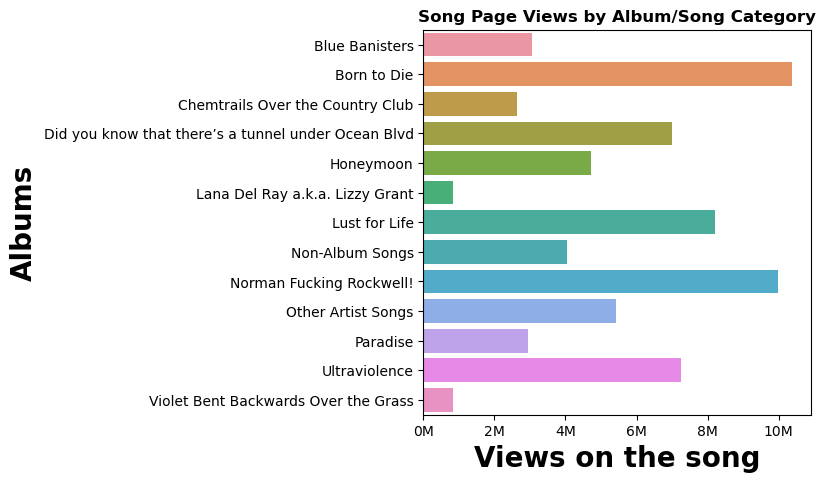

In [7]:
figure, array = plt.subplots(figsize=(5, 5))
sns.barplot(hvs, x = 'song_page_views', y = 'category')
plt.title('Song Page Views by Album/Song Category', fontweight='bold', fontsize='large')
plt.xlabel('Views on the song', fontweight='bold', fontsize=20)
plt.ylabel('Albums', fontweight='bold', fontsize=20)
array.xaxis.set_major_formatter(tic.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000000) + 'M'))


Here we can conclude that the Album 'Born to Die' was the one liked by most of the people and 'Norman Fucking Rockwell!'
and 'Ultravoilence' on 2nd and 3rd place respectively.
'Lana Del Ray a.k.a. Lizzy Grant' didn't get much views but many people listened to it as well.

The above one was a basic apporach if we see the top 10 songs without categorising them then the results would be seem a 
little off

In [8]:
lana.sort_values('song_page_views',ascending=False).head(10)

,category,song_title,song_page_views
103,Non-Album Songs,Young and Beautiful,2000000
133,Other Artist Songs,Party Monster,1900000
20,Born to Die,Summertime Sadness,1600000
174,Ultraviolence,West Coast,1400000
146,Other Artist Songs,Snow On The Beach,1300000
53,Did you know that there’s a tunnel under Ocean...,A&W,1300000
25,Born to Die,Video Games,1200000
93,Lust for Life,Love,1200000
94,Lust for Life,Lust for Life (Ft. The Weeknd),1200000
124,Norman Fucking Rockwell!,Norman fucking Rockwell,1200000


here we can see that alone 'Young and Beautiful' alone got 2 million views and still it's album is not on the top 3 in the above
barchart so it gives us an idea that there might be some disturbing issues with the page view songs

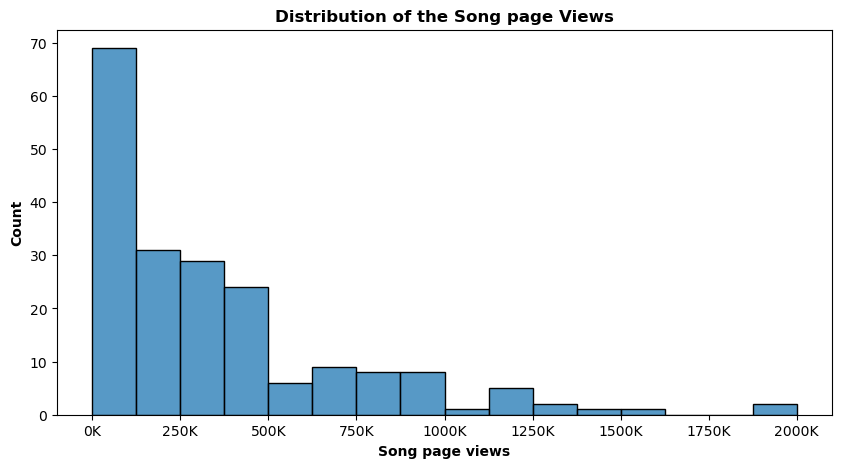

In [9]:
#checking the distrubution of the song_page_views
figure2, array2 = plt.subplots(figsize=(10, 5))
sns.histplot(lana,x='song_page_views')
plt.title("Distribution of the Song page Views", fontweight='bold', fontsize='large')
plt.xlabel('Song page views', fontweight='bold', fontsize='medium')
plt.ylabel('Count', fontweight='bold', fontsize='medium')
array2.xaxis.set_major_formatter(tic.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'K'))

we can see that the data is skewed to the right that means we need to look at the box plot for the dispersion of the data

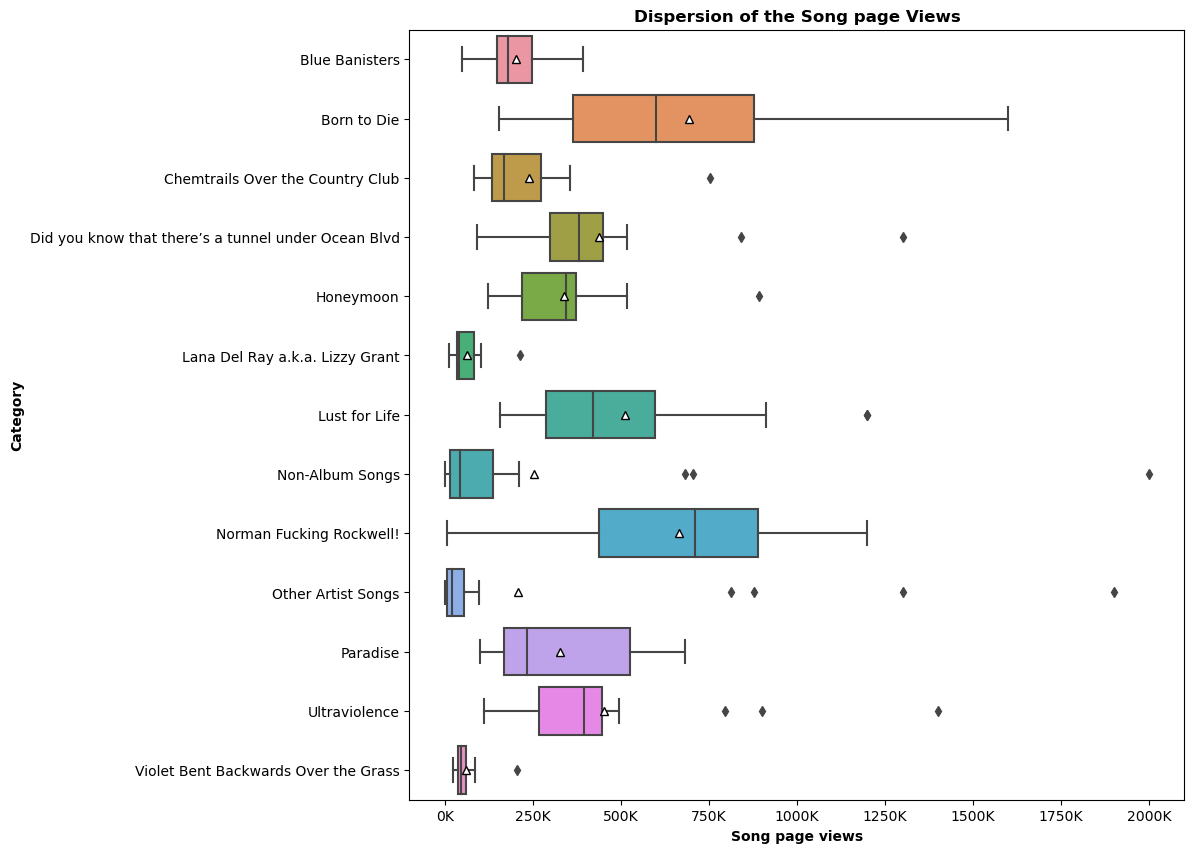

In [10]:
figure3, array3 = plt.subplots(figsize=(10,10))
sns.boxplot(lana,x='song_page_views',y='category',showmeans=True,
           meanprops={'markerfacecolor': figure3.get_facecolor(), 'markeredgecolor': '#000000'})
plt.title("Dispersion of the Song page Views", fontweight='bold', fontsize='large')
plt.xlabel('Song page views', fontweight='bold', fontsize='medium')
plt.ylabel('Category', fontweight='bold', fontsize='medium')
array3.xaxis.set_major_formatter(tic.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'K'))

Okay now if we see the boxplot we can already see that except for "Honeymoon" and "Norman Fucking Rockwell!" all other have there mean more then the median due to the outliers in the data.
We can also see that "Born to die" has no outliers but the one with the highest one is the "Norman Fucking Rockwell" that means 
on an average "Norman Fucking Rockwell" got more views compared to any other category.
As for the lowest viewed it's other artist song having the least median.

In [11]:
#finding who does Lana Del Rey collaborate with most frequently?
#we first flatten the data
df['song_artists'] = df['song_artists'].apply(eval)
all_artists = [artist for sublist in df['song_artists'] for artist in sublist]

In [12]:
artist_counts = pd.DataFrame(all_artists).value_counts()
artist_counts

Lana Del Rey            189
Bleachers                 4
The Weeknd                4
A$AP Rocky                2
Jon Batiste               2
Miles Kane                2
Rob Grant                 2
Taylor Swift              2
Mando Diao                2
Father John Misty         2
SYML                      1
Sean Lennon               1
Saint Avangeline          1
Playboi Carti             1
Smiler                    1
Stevie Nicks              1
Tommy Genesis             1
Weyes Blood               1
RIOPY                     1
Matt Maeson               1
Nikki Lane                1
Miley Cyrus               1
Ariana Grande             1
Kacey Musgraves           1
Holly Macve               1
Emile Haynie              1
Cheryl                    1
Cat Power                 1
BØRNS                     1
Bobby Womack              1
Bastille                  1
Barrie-James O’Neill      1
Zella Day                 1
dtype: int64

In [13]:
artist_count = artist_counts.drop('Lana Del Rey')

C:\Users\rtani\AppData\Local\Temp\ipykernel_15124\1526508059.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  artist_count = artist_counts.drop('Lana Del Rey')


In [14]:
frequency = artist_count.max()
most_frequent_collaborator = artist_count[artist_count == frequency]

In [15]:
print(f"The one with most collaborations are {most_frequent_collaborator} with {frequency} collobrations")

The one with most collaborations are Bleachers     4
The Weeknd    4
dtype: int64 with 4 collobrations
